In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, expon, chi2, uniform
import matplotlib.pyplot as plt
%matplotlib inline

# Foundations for statistical inference - Confidence intervals

Based on OpenIntro Labs for Python: https://github.com/vaksakalli/stats_tutorials, https://www.openintro.org/book/os/

## Sampling from King County

Let's first load the data that we already know: the official public records of all 21613 home sales from May 2014 through May 2015 in the King County area, Washington State (https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html). 

In [2]:
house_df = pd.read_csv('kc_house_data.csv')

This is what we would call a "population", that is *all* home sales in that period in that area. It allows to answer questions like, "How big is the typical house sold in King County in 2014?" and "How much variation is there in sizes of houses sold in that area in that period?".

Gathering information on an entire population is often extremely costly or impossible, and so having access to it is rarely the case in real life. Because of this, we often take a *sample* of the population and use that to understand the properties of the population.

If you have access to only a sample of the population, answering the above questions becomes more complicated. What is your best guess for the typical size if you only know the sizes of several dozen houses? Guessing from samples to conclude about the population is called *inference*.

### Exercise 1
a) take a sample of N=100 random house prices, and compare histograms, means, and standard deviations of the sample and the population. Repeat it several times and observe what changes.

Population Mean: 540088.14
Population Std Dev: 367127.20


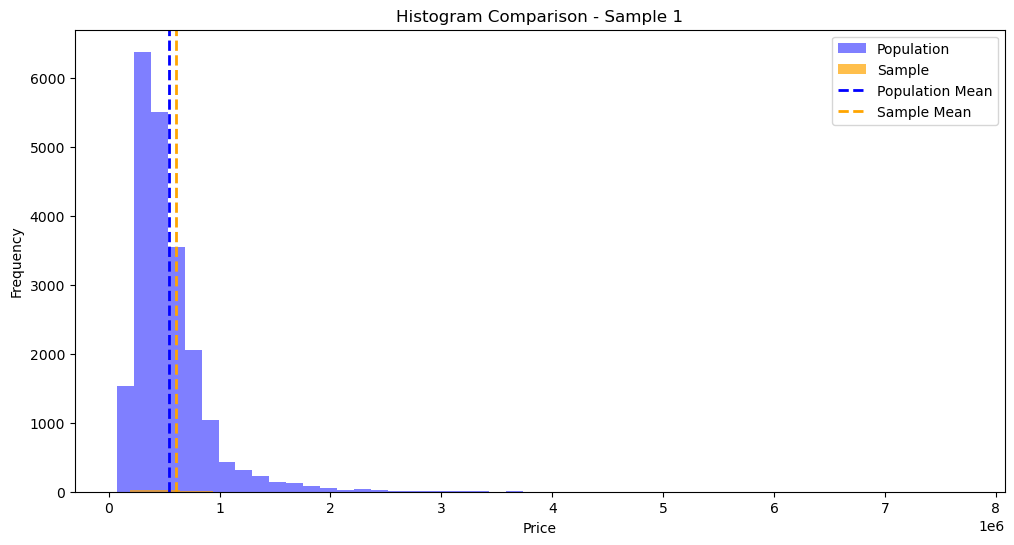

Sample 1 Mean: 603999.58
Sample 1 Std Dev: 439458.56



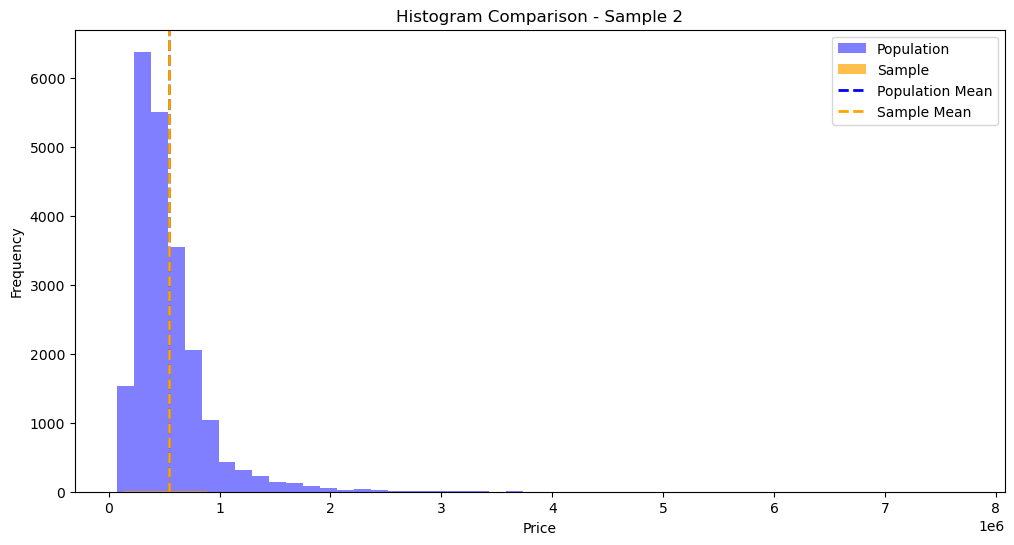

Sample 2 Mean: 541517.08
Sample 2 Std Dev: 287201.69



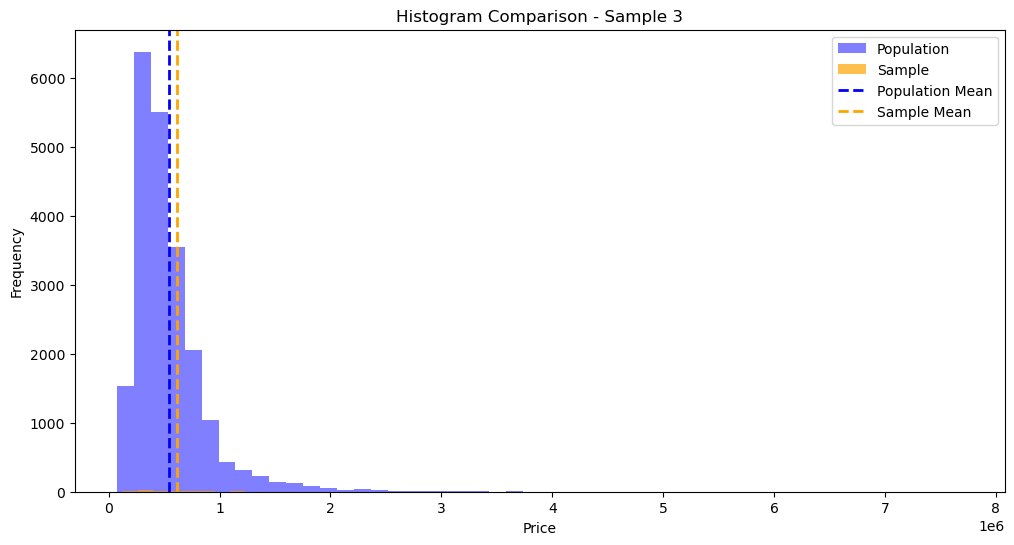

Sample 3 Mean: 611778.49
Sample 3 Std Dev: 412208.90



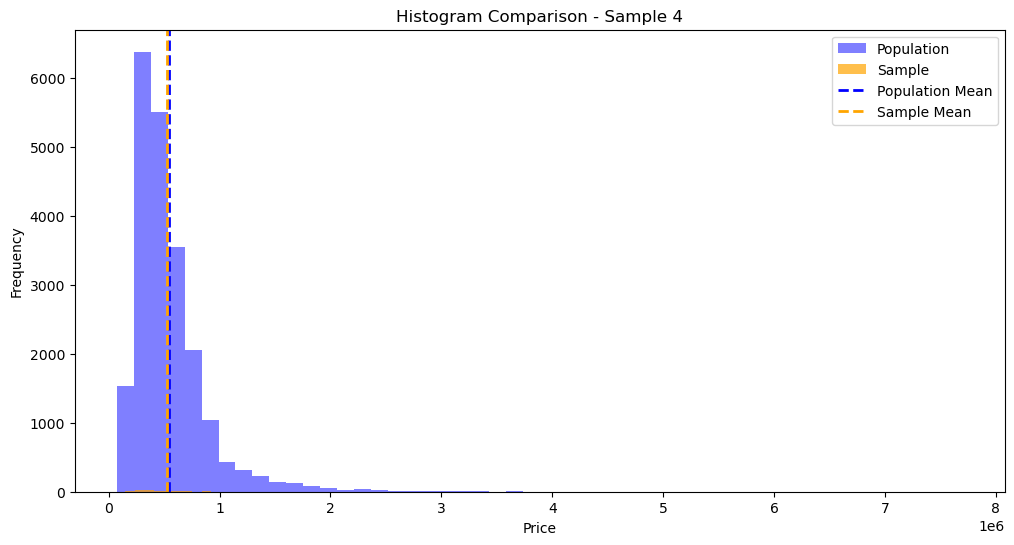

Sample 4 Mean: 529117.38
Sample 4 Std Dev: 305720.72



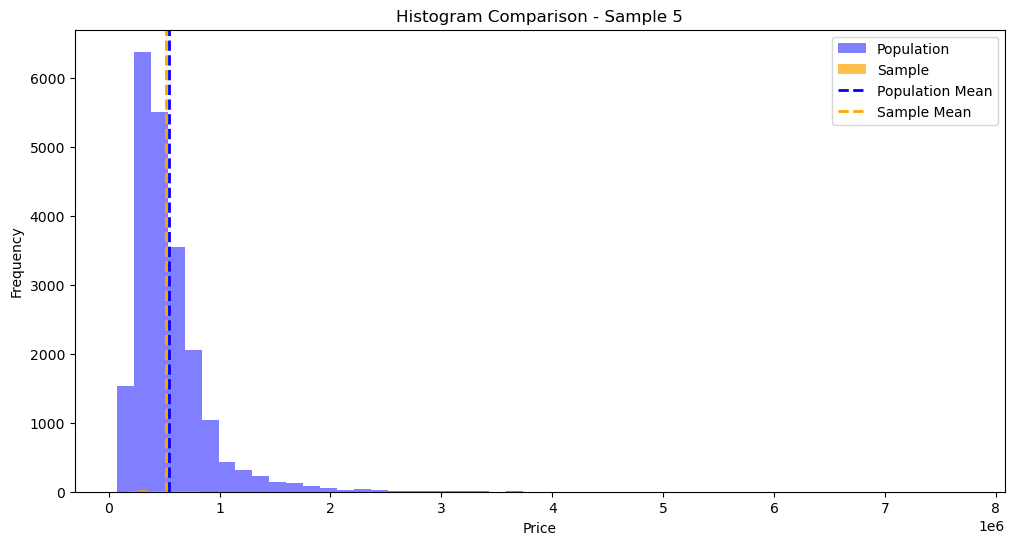

Sample 5 Mean: 515254.41
Sample 5 Std Dev: 280175.92



In [3]:
# Extract house prices
prices = house_df["price"]

# Function to sample and compare
def sample_and_compare(prices, sample_size=100, repetitions=5):
    # Calculate population statistics
    population_mean = prices.mean()
    population_std = prices.std()

    print(f"Population Mean: {population_mean:.2f}")
    print(f"Population Std Dev: {population_std:.2f}")

    for i in range(repetitions):
        # Take a random sample
        sample_prices = prices.sample(n=sample_size, random_state=i)
        sample_mean = sample_prices.mean()
        sample_std = sample_prices.std()

        # Plot histograms
        plt.figure(figsize=(12, 6))
        plt.hist(prices, bins=50, alpha=0.5, label='Population', color='blue')
        plt.hist(sample_prices, bins=20, alpha=0.7, label='Sample', color='orange')
        plt.axvline(population_mean, color='blue', linestyle='dashed', linewidth=2, label='Population Mean')
        plt.axvline(sample_mean, color='orange', linestyle='dashed', linewidth=2, label='Sample Mean')
        plt.title(f"Histogram Comparison - Sample {i + 1}")
        plt.xlabel("Price")
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()

        # Print statistics for the sample
        print(f"Sample {i + 1} Mean: {sample_mean:.2f}")
        print(f"Sample {i + 1} Std Dev: {sample_std:.2f}\n")

# Perform the comparison
sample_and_compare(prices)


Not surprisingly, every time we take another random sample, we get a different sample mean. It's useful to get a sense of just how much variability we should expect when estimating the population mean this way. The distribution of sample means, called the *sampling distribution*, can help us understand this variability. Here, because we have access to the population, we can build up the sampling distribution for the sample mean by repeating the above steps many times.

- Variation in Sample Means:

Each sample's mean is close to the population mean, but it fluctuates across repetitions.
This is expected due to random sampling variability. The differences decrease as the sample size increases.

- Variation in Sample Standard Deviations:

Sample standard deviations are generally smaller than the population's but show significant variability across samples.
This is because smaller samples are more influenced by outliers or clusters in the data distribution.

- Histogram Shapes:

Population histograms are smoother because they include all data points.
Sample histograms vary more in shape, reflecting the smaller number of data points. Some features of the distribution, like outliers or skewness, might be overrepresented or underrepresented in specific samples.

- Impact of Randomness:

The randomness in selecting samples means some will align more closely with the population's characteristics, while others will deviate more.
Repeated sampling helps to illustrate the variability inherent in estimating population parameters from samples.

- Key Takeaways:

Law of Large Numbers: The sample mean gets closer to the population mean with repeated sampling or larger sample sizes.
Sample-to-Population 
Generalization: Smaller samples can provide insights into population characteristics but are subject to more variability.
Variability in Observations: Each random sample highlights that no single sample can perfectly represent the population, underscoring the need for multiple samples or larger datasets for accuracy.

b) generate 1000 samples and compute the sample mean of each. Plot the sampling distribution against the population mean.

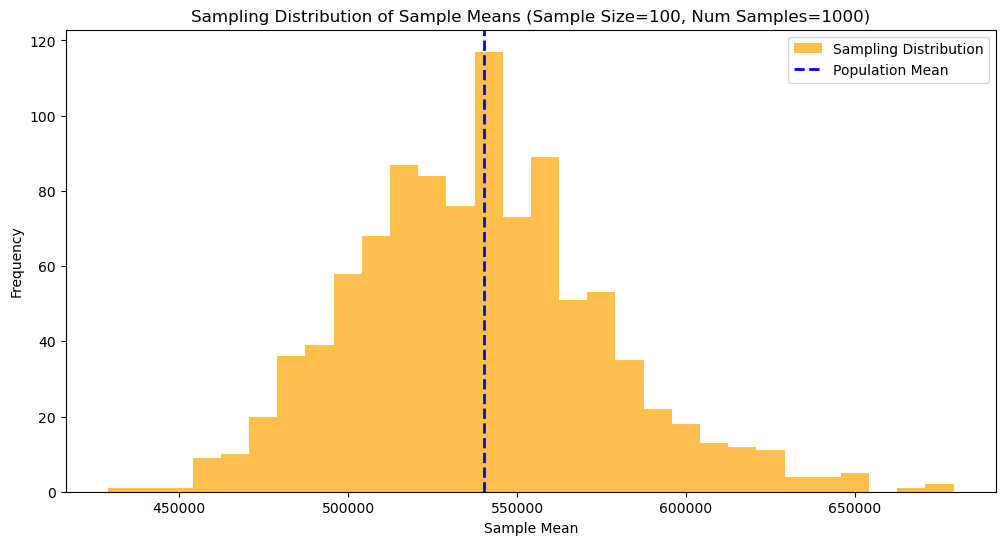

Population Mean: 540088.14
Sampling Distribution Mean: 538705.03
Sampling Distribution Std Dev: 37360.58


In [4]:
# Extract house prices
prices = house_df["price"]

# Function to compute sample means and plot the sampling distribution
def plot_sampling_distribution(prices, sample_size=100, num_samples=1000):
    population_mean = prices.mean()
    sample_means = []

    # Generate samples and compute their means
    for i in range(num_samples):
        sample_prices = prices.sample(n=sample_size, random_state=i)
        sample_mean = sample_prices.mean()
        sample_means.append(sample_mean)

    # Plot the sampling distribution of the sample means
    plt.figure(figsize=(12, 6))
    plt.hist(sample_means, bins=30, alpha=0.7, color='orange', label='Sampling Distribution')
    plt.axvline(population_mean, color='blue', linestyle='dashed', linewidth=2, label='Population Mean')
    plt.title(f"Sampling Distribution of Sample Means (Sample Size={sample_size}, Num Samples={num_samples})")
    plt.xlabel("Sample Mean")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    # Print statistics
    print(f"Population Mean: {population_mean:.2f}")
    print(f"Sampling Distribution Mean: {np.mean(sample_means):.2f}")
    print(f"Sampling Distribution Std Dev: {np.std(sample_means):.2f}")

# Perform the sampling and plot the distribution
plot_sampling_distribution(prices)

Because the sample mean is an unbiased estimator, the sampling distribution is centered at the true average living area of the the population, and the spread of the distribution indicates how much variability is induced by sampling only 100 home sales.
The standard deviation of sampling distribution is called the *standard error (SE)* of a statistic. If the parameter or the statistic is the mean, it is called the *standard error of the mean (SEM)*.

To get a sense of the effect that sample size has on our distribution, let's build up more sampling distributions:

c) build sampling distributions for $N=2, 4, 8, ..., 4096$, compute their standard deviations, plot them on logarithmic-logarithimics scale, and compare them to $1/\sqrt{N}$.

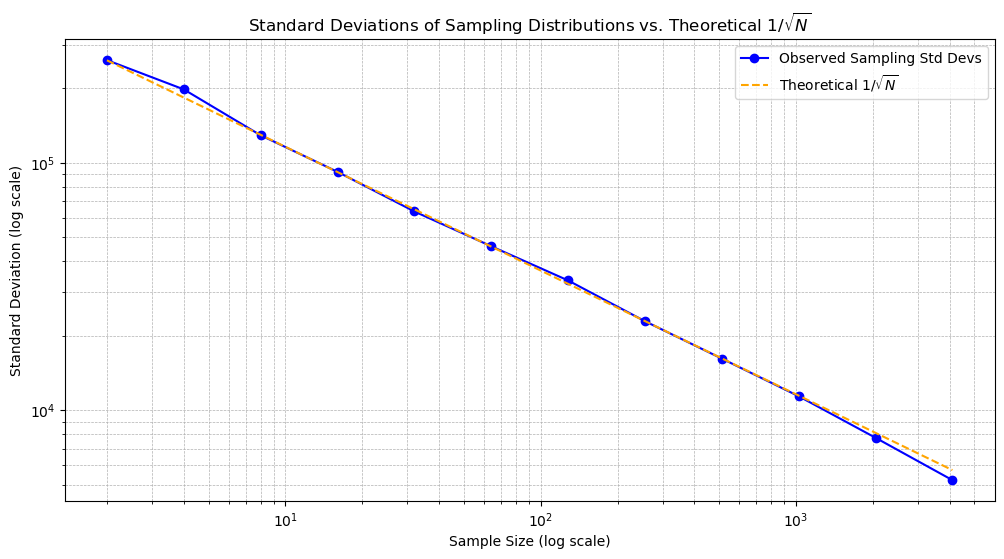

In [5]:
# Extract house prices
prices = house_df["price"]

# Function to build sampling distributions and plot their standard deviations
def plot_sampling_distributions(prices, max_sample_size=4096):
    # Define sample sizes as powers of 2
    sample_sizes = [2**i for i in range(1, int(np.log2(max_sample_size)) + 1)]
    population_std = prices.std()
    sampling_std_devs = []

    # Compute sampling distribution standard deviations
    for sample_size in sample_sizes:
        sample_means = []
        for _ in range(1000):  # Generate 1000 samples for each sample size
            sample_prices = prices.sample(n=sample_size, random_state=None)
            sample_mean = sample_prices.mean()
            sample_means.append(sample_mean)
        # Compute and store standard deviation of the sample means
        sampling_std_dev = np.std(sample_means)
        sampling_std_devs.append(sampling_std_dev)

    # Compute theoretical standard deviations (1/sqrt(N))
    theoretical_std_devs = [population_std / np.sqrt(N) for N in sample_sizes]

    # Plot on log-log scale
    plt.figure(figsize=(12, 6))
    plt.loglog(sample_sizes, sampling_std_devs, marker='o', label='Observed Sampling Std Devs', color='blue')
    plt.loglog(sample_sizes, theoretical_std_devs, linestyle='dashed', label=r'Theoretical $1/\sqrt{N}$', color='orange')
    plt.title("Standard Deviations of Sampling Distributions vs. Theoretical $1/\\sqrt{N}$")
    plt.xlabel("Sample Size (log scale)")
    plt.ylabel("Standard Deviation (log scale)")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

# Perform the analysis
plot_sampling_distributions(prices)


As expected (https://en.wikipedia.org/wiki/Standard_error#Standard_error_of_the_mean) SEM behaves like $\propto 1/\sqrt{N}$, which means that the larger sample you have, the more precise estimate of the population mean you can derive.

## Confidence intervals
One of the most common ways to describe the typical or central value of a distribution is to use *point estimate*, i.e., a single plausible value for a parameter, e.g., the sample mean (usually denoted as $\bar{x}$). However, usually there is some error in the estimate. In addition to supplying a point estimate of a parameter, a next logical step would be to provide a plausible range of values, in our case a *confidence interval*.

After setting the *confidence level* (the probability that the parameter lies in a given interval), usually 95%, we can compute the confidence interval (CI) for the sample mean.
If the sampling distribution is normally distributed one can do it by adding and subtracting 1.96 standard errors to the point estimate: $\bar{x}\pm 1.96\times SE$.

In [6]:
sample_prices = prices.sample(100)
sample_mean=sample_prices.mean()
se = np.std(sample_prices)/np.sqrt(100)
lower = sample_mean - (1.96 * se)
upper = sample_mean + (1.96 * se)
print(lower, upper)

473419.56913207984 754453.8508679201


This is an important inference that we've just made: even though we don't know what the full population looks like, we're 95% confident that the true average price of houses sold in Kings County lies between the values `lower` and `upper`. There are a few conditions that must be met for this interval to be valid.

## Exercise 2
a) generate a normal distribution with the mean and standard deviation equal to the ones from the price distribution.
Compute the probability (use *cumulative distribution function*, `cdf`) of the random variable lying inside the interval $[\mu-1.96\times \sigma,\mu+1.96\times \sigma]$ (where $\mu$ and $\sigma$ are population parameters).
Plot it.
Compute a 99% confidence interval (use `interval`).

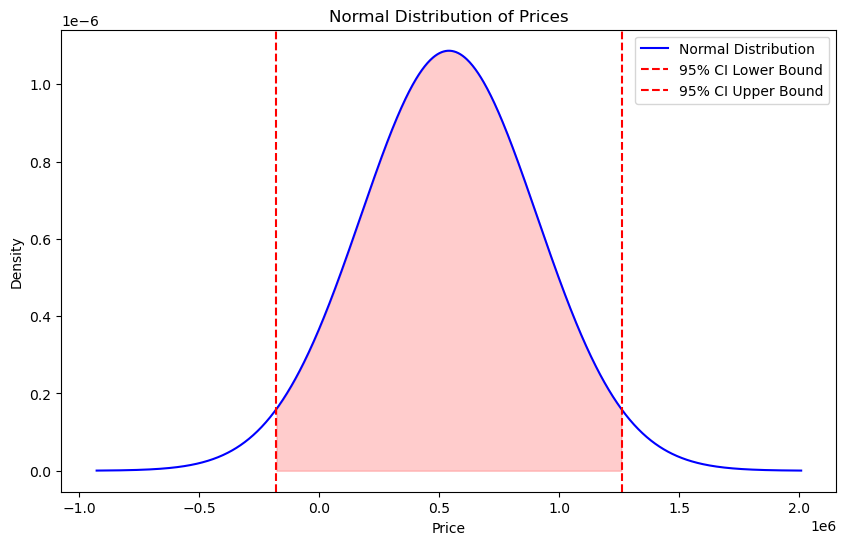

Mean (μ): 540088.1417665294
Standard Deviation (σ): 367127.1964826997
Probability within [μ - 1.96σ, μ + 1.96σ]: 95.00%
99% Confidence Interval: (-405568.8490633633, 1485745.132596422)


In [7]:
# Extract the price column
prices = house_df['price']

# Calculate mean and standard deviation
mu = prices.mean()
sigma = prices.std()

# Generate a range for plotting the normal distribution
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)

# Compute the normal distribution
pdf = norm.pdf(x, mu, sigma)

# Calculate CDF for the interval [μ - 1.96σ, μ + 1.96σ]
lower_bound = mu - 1.96 * sigma
upper_bound = mu + 1.96 * sigma
probability = norm.cdf(upper_bound, mu, sigma) - norm.cdf(lower_bound, mu, sigma)

# Calculate the 99% confidence interval
ci_99 = norm.interval(0.99, loc=mu, scale=sigma)

# Plot the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Normal Distribution', color='blue')
plt.axvline(lower_bound, color='red', linestyle='--', label='95% CI Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='95% CI Upper Bound')
plt.fill_between(x, pdf, where=(x >= lower_bound) & (x <= upper_bound), color='red', alpha=0.2)
plt.title('Normal Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

# Print the results
print(f"Mean (μ): {mu}")
print(f"Standard Deviation (σ): {sigma}")
print(f"Probability within [μ - 1.96σ, μ + 1.96σ]: {probability * 100:.2f}%")
print(f"99% Confidence Interval: {ci_99}")


b) generate a sample of $N=10 000$ normally distributed random numbers with the mean and standard deviation equal to the ones from the price distribution.
Compute the mean and standard deviation of such a sample.
Compute what percentage of numbers lie outside of the interval: $[\bar{x}-1.96\times SD,\bar{x}+1.96\times SD]$.

In [8]:
# Set sample size
N = 10000

# Generate a sample of N normally distributed random numbers
sample = np.random.normal(loc=mu, scale=sigma, size=N)

# Compute the sample mean and standard deviation
sample_mean = sample.mean()
sample_std = sample.std()

# Define the interval [x̄ - 1.96 * SD, x̄ + 1.96 * SD]
lower_bound_sample = sample_mean - 1.96 * sample_std
upper_bound_sample = sample_mean + 1.96 * sample_std

# Calculate the percentage of numbers outside the interval
outside_interval = np.sum((sample < lower_bound_sample) | (sample > upper_bound_sample))
percentage_outside = (outside_interval / N) * 100

# Print the results
print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")
print(f"Percentage of numbers outside [x̄ - 1.96 * SD, x̄ + 1.96 * SD]: {percentage_outside:.2f}%")


Sample Mean: 538528.012893783
Sample Standard Deviation: 365032.5965298697
Percentage of numbers outside [x̄ - 1.96 * SD, x̄ + 1.96 * SD]: 4.87%


c) take $N=1000$ samples of size $n=50$ from the data prices.
For each sample compute mean, SEM and a confidence interval. Check if the *true population mean* lies within or without the CI.
What is the percentage of instances that the true mean what not in the CI?

In [9]:
# Set parameters
N = 1000  # Number of samples
n = 50    # Size of each sample

# Initialize counters and lists
outside_count = 0  # Count instances where true mean is not in the CI

for _ in range(N):
    # Take a random sample of size n
    sample = prices.sample(n, replace=True)
    
    # Compute sample mean and SEM
    sample_mean = sample.mean()
    sample_sem = sample.std() / np.sqrt(n)
    
    # Compute 95% confidence interval
    lower_bound = sample_mean - 1.96 * sample_sem
    upper_bound = sample_mean + 1.96 * sample_sem
    
    # Check if the true population mean lies outside the CI
    if mu < lower_bound or mu > upper_bound:
        outside_count += 1

# Compute percentage of instances where true mean is not in the CI
percentage_outside = (outside_count / N) * 100

# Print results
print(f"Percentage of instances where true mean is NOT in the CI: {percentage_outside:.2f}%")


Percentage of instances where true mean is NOT in the CI: 9.10%


Now, look again at the result Ex.2b and the meaning of confidence level.
A 95% confidence level does not state that for a given realized interval there is a 95% probability that the population parameter lies within the interval (i.e., a 95% probability that the interval covers the population parameter).
The confidence level states that 95% of randomly chosen samples produce confidence interval that cover the population parameter, and 5% of samples have CIs that do not cover the true value.

For reference, see: https://en.wikipedia.org/wiki/Confidence_interval#Meaning_and_interpretation

# Inference for numerical data
## North Carolina births
In 2004, the state of North Carolina released a large data set containing information on births recorded in this state. This data set is useful to researchers studying the relation between habits and practices of expectant mothers and the birth of their children. We will work with a random sample of observations from this data set.

Load the `nc` data set into our notebook.

In [11]:
nc = pd.read_csv('nc.csv')

We have observations on 13 different variables, some categorical and some numerical. The meaning of each variable is as follows.

| variable         | description |
| ---------------- | ------------|
| `fage`           | father's age in years. |
| `mage`           | mother's age in years. |
| `mature`         | maturity status of mother. |
| `weeks`          | length of pregnancy in weeks. |
| `premie`         | whether the birth was classified as premature (premie) or full-term. |
| `visits`         | number of hospital visits during pregnancy. |
| `marital`        | whether mother is `married` or `not married` at birth. |
| `gained`         | weight gained by mother during pregnancy in pounds. |
| `weight`         | weight of the baby at birth in pounds. |
| `lowbirthweight` | whether baby was classified as low birthweight (`low`) or not (`not low`). |
| `gender`         | gender of the baby, `female` or `male`. |
| `habit`          | status of the mother as a `nonsmoker` or a `smoker`. |
| `whitemom`       | whether mom is `white` or `not white`. |

## Exercise 3
Consider the possible relationship between a mother's smoking habit and the weight of her baby.

a) plot histograms of baby weights for smoker and non-smoker mothers. Compute means of these two groups (use `groupby`).

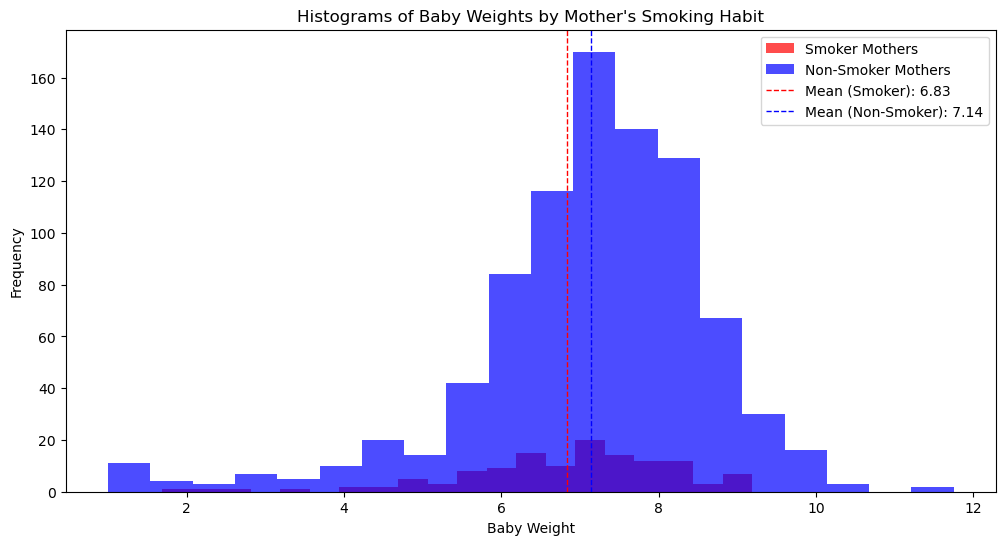

Mean baby weight for smoker mothers: 6.83
Mean baby weight for non-smoker mothers: 7.14


In [12]:
# Separate data based on smoking habit
nc_weightANDsmoker = nc[nc['habit'] == 'smoker']['weight']
nc_weightANDnonsmoker = nc[nc['habit'] == 'nonsmoker']['weight']

# Compute means for each group
mean_weight_smoker = nc_weightANDsmoker.mean()
mean_weight_nonsmoker = nc_weightANDnonsmoker.mean()

# Plot histograms
plt.figure(figsize=(12, 6))
plt.hist(nc_weightANDsmoker, bins=20, alpha=0.7, label='Smoker Mothers', color='red')
plt.hist(nc_weightANDnonsmoker, bins=20, alpha=0.7, label='Non-Smoker Mothers', color='blue')
plt.axvline(mean_weight_smoker, color='red', linestyle='dashed', linewidth=1, label=f'Mean (Smoker): {mean_weight_smoker:.2f}')
plt.axvline(mean_weight_nonsmoker, color='blue', linestyle='dashed', linewidth=1, label=f'Mean (Non-Smoker): {mean_weight_nonsmoker:.2f}')
plt.title('Histograms of Baby Weights by Mother\'s Smoking Habit')
plt.xlabel('Baby Weight')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Output means
print(f"Mean baby weight for smoker mothers: {mean_weight_smoker:.2f}")
print(f"Mean baby weight for non-smoker mothers: {mean_weight_nonsmoker:.2f}")

The histogram shows a clear difference in baby weights based on the mother's smoking habit. Babies of non-smoker mothers have a higher average weight (7.14 units) compared to those of smoker mothers (6.83 units). Additionally, the group of non-smoker mothers (873) is much larger than that of smoker mothers (126), which is reflected in the higher frequency of blue bars in the histogram. The weight distribution for babies of non-smoker mothers is broader, suggesting greater variation, while for smoker mothers, it is narrower and shifted towards lower weights. This indicates a potential negative impact of smoking on baby weight, though further analysis is needed to confirm causation and account for other factors.

We will now conduct hypothesis tests for testing if the average weights of babies born to smoking and non-smoking mothers are different. For this task, we can use [`statsmodels`](https://www.statsmodels.org/stable/index.html), a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

b) use `DescrStatsW` to compute means and sample sizes. Then use `CompareMeans` to perform a t-test for difference between the two means, compute CI of the difference and find the p-value. Assuming we set a significance level of 0.05 to reach any conclusion, what is the verdict?

In [16]:
import statsmodels.stats.weightstats as st

# Compute descriptive statistics for both groups
dsw1 = st.DescrStatsW(nc_weightANDsmoker)
dsw2 = st.DescrStatsW(nc_weightANDnonsmoker)

# Compare means using CompareMeans
cm = st.CompareMeans(dsw1, dsw2)

# Perform a t-test for the difference in means
t_stat, p_value, df = cm.ttest_ind(usevar='unequal')

# Compute the confidence interval for the difference in means
ci_low, ci_high = cm.tconfint_diff(alpha=0.05, usevar='unequal')

# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print(f"95% Confidence Interval for the Difference in Means: ({ci_low}, {ci_high})")

# Conclusion based on p-value
if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference between the average weights of babies born to smoking and non-smoking mothers.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference between the average weights of babies born to smoking and non-smoking mothers.")


T-statistic: -2.3590109449334946
P-value: 0.019450556443732607
95% Confidence Interval for the Difference in Means: (-0.5795732754056026, -0.05151165341128172)
Conclusion: Reject the null hypothesis. There is a significant difference between the average weights of babies born to smoking and non-smoking mothers.


c) the caveat is that we have not checked t-test assumptions: normality and equal variances of the two samples.
Let's use Shapiro-Wilk for the former, and Levene test for the latter.
And since the assumptions of Student's t-test will turn out to be not fulfilled, let's use Mann-Whitney's U test to compare the two groups.

In [17]:
from scipy.stats import shapiro, levene, mannwhitneyu

# Shapiro-Wilk test for normality
shapiro_smoker_stat, shapiro_smoker_p = shapiro(nc_weightANDsmoker)
shapiro_nonsmoker_stat, shapiro_nonsmoker_p = shapiro(nc_weightANDnonsmoker)

# Levene's test for equal variances
levene_stat, levene_p = levene(nc_weightANDsmoker, nc_weightANDnonsmoker)

# Mann-Whitney U test (non-parametric)
mw_stat, mw_p = mannwhitneyu(nc_weightANDsmoker, nc_weightANDnonsmoker, alternative='two-sided')

# Print results
print("Shapiro-Wilk Test (Smoker):")
print(f"Statistic: {shapiro_smoker_stat}, P-value: {shapiro_smoker_p}")
print("Shapiro-Wilk Test (Non-Smoker):")
print(f"Statistic: {shapiro_nonsmoker_stat}, P-value: {shapiro_nonsmoker_p}")

print("\nLevene's Test for Equal Variances:")
print(f"Statistic: {levene_stat}, P-value: {levene_p}")

print("\nMann-Whitney U Test:")
print(f"Statistic: {mw_stat}, P-value: {mw_p}")

# Conclusion
if shapiro_smoker_p < 0.05 or shapiro_nonsmoker_p < 0.05:
    print("\nNormality assumption violated.")
else:
    print("\nNormality assumption fulfilled.")

if levene_p < 0.05:
    print("Equal variance assumption violated.")
else:
    print("Equal variance assumption fulfilled.")

if mw_p < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference between the two groups (Mann-Whitney U test).")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference between the two groups (Mann-Whitney U test).")


Shapiro-Wilk Test (Smoker):
Statistic: 0.9442494511604309, P-value: 5.528236215468496e-05
Shapiro-Wilk Test (Non-Smoker):
Statistic: 0.9260292053222656, P-value: 2.6287271569942437e-20

Levene's Test for Equal Variances:
Statistic: 0.2606612542534784, P-value: 0.6097792469101571

Mann-Whitney U Test:
Statistic: 46616.0, P-value: 0.005621772106279787

Normality assumption violated.
Equal variance assumption fulfilled.
Conclusion: Reject the null hypothesis. There is a significant difference between the two groups (Mann-Whitney U test).


Which means you'd better quit smoking.